## Story-telling on Exchange Rates

This project aims to describe Euro daily exchange rates between 1999 and 2021. The following concepts were used in the accomplishment of this project:

- Data visualization principles
- Matplotlib functions

### Loading the packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd

### Loading the dataset

In [2]:
exchange_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")
exchange_rates

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


Based on the information below, there are 5,699 rows in total across 41 columns in the dataset. Majority of the data types are found to be objects/character with the exception of Iceland, Romanian, and Turkish currency columns. There were also null values present in the dataset.

In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

### Cleaning the dataset

To simplify the main columns such as time and the US dollar currency, we'll be renaming those columns and convert them to their corresponding data types

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [5]:
exchange_rates['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.0867     6
          ..
1.3353     1
0.9279     1
1.2916     1
1.0809     1
0.8839     1
Name: US_dollar, Length: 3528, dtype: int64

Since we observed from above that the "-" appeared 62 times in the column, we'll be dropping those observations from the dataset.

In [6]:
exchange_rates = exchange_rates[exchange_rates['US_dollar'] != '-']
exchange_rates['US_dollar'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.3532    6
1.1346    6
         ..
1.3353    1
0.9279    1
1.2916    1
1.0809    1
0.8839    1
Name: US_dollar, Length: 3527, dtype: int64

In [7]:
exchange_rates['US_dollar'] = exchange_rates['US_dollar'].astype('float')
exchange_rates.dtypes

<ipython-input-7-743b5325f792>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Time                        datetime64[ns]
[Australian dollar ]                object
[Bulgarian lev ]                    object
[Brazilian real ]                   object
[Canadian dollar ]                  object
[Swiss franc ]                      object
[Chinese yuan renminbi ]            object
[Cypriot pound ]                    object
[Czech koruna ]                     object
[Danish krone ]                     object
[Estonian kroon ]                   object
[UK pound sterling ]                object
[Greek drachma ]                    object
[Hong Kong dollar ]                 object
[Croatian kuna ]                    object
[Hungarian forint ]                 object
[Indonesian rupiah ]                object
[Israeli shekel ]                   object
[Indian rupee ]                     object
[Iceland krona ]                   float64
[Japanese yen ]                     object
[Korean won ]                       object
[Lithuanian litas ]                 object
[Latvian la

### Visualizing the Euro Value against the US Dollar

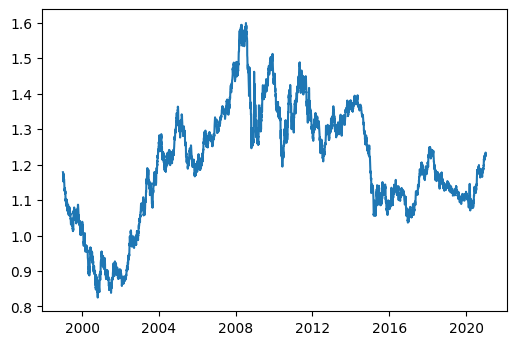

In [8]:
%matplotlib inline

plt.plot(exchange_rates['Time'],
         exchange_rates['US_dollar'])
plt.show()

In [9]:
exchange_rates['rolling_mean'] = exchange_rates['US_dollar'].rolling(30).mean()
exchange_rates

<ipython-input-9-87ba31da5009>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ],rolling_mean
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358,NaN
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975,NaN
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307,NaN
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283,NaN
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214,1.211170
5695,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194,1.212530
5696,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123,1.213987
5697,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919,1.215357


### How did the Euro-dollar rate changed during the 2007-2008 financial crisis?

In [12]:
eu_to_dollar = exchange_rates[['Time', 'US_dollar', 'rolling_mean']]
eu_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


In [13]:
eu_to_dollar = eu_to_dollar[eu_to_dollar['Time'].between('2006-01-01', '2010-01-01', inclusive='both')]
eu_to_dollar

,Time,US_dollar,rolling_mean
1825,2006-01-02,1.1826,1.183087
1826,2006-01-03,1.1875,1.183300
1827,2006-01-04,1.2083,1.184573
1828,2006-01-05,1.2088,1.185613
1829,2006-01-06,1.2093,1.186647
...,...,...,...
2863,2009-12-24,1.4398,1.477640
2865,2009-12-28,1.4405,1.476097
2866,2009-12-29,1.4433,1.474323
2867,2009-12-30,1.4338,1.472533


[732312. 732493. 732677. 732858. 733042. 733224. 733408. 733589. 733773.]


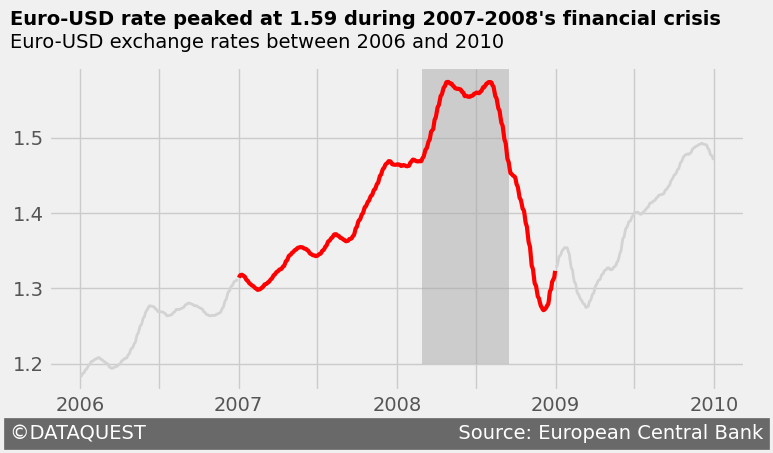

In [122]:
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle

%matplotlib inline
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize = (8, 4))
ax.plot(eu_to_dollar[eu_to_dollar['Time'] < '2007-01-01']['Time'], 
        eu_to_dollar[eu_to_dollar['Time'] < '2007-01-01']['rolling_mean'],
        color = 'lightgrey', linewidth = 2)

ax.plot(eu_to_dollar[eu_to_dollar['Time'].between('2007-01-01', '2008-12-31', inclusive='both')]['Time'], 
        eu_to_dollar[eu_to_dollar['Time'].between('2007-01-01', '2008-12-31', inclusive='both')]['rolling_mean'],
        color = 'red', linewidth = 3)

ax.plot(eu_to_dollar[eu_to_dollar['Time'] > '2008-12-31']['Time'], 
        eu_to_dollar[eu_to_dollar['Time'] > '2008-12-31']['rolling_mean'],
        color = 'lightgrey', linewidth = 2)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_yticks([1.2, 1.3, 1.4, 1.5])
ax.set_xticklabels(['2006','','2007','','2008','','2009','','2010'])

ax.text(732150, 1.1, '©DATAQUEST' + ' '*50 + 'Source: European Central Bank',
       color = 'white', backgroundcolor = 'dimgrey')
ax.text(732150, 1.65, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
       weight='bold')

ax.text(732150, 1.62, "Euro-USD exchange rates between 2006 and 2010")
ax.add_patch(Rectangle((733100, 1.2), 200, 6, facecolor='darkgrey', alpha=0.5))

print(ax.get_xticks())
plt.show()